# KNN Algorithm

In [4]:
# Imports ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_excel("data/exp_vs_sal.xlsx")
data.head(50)

,Experience,Salary
0,1.6,47096
1,2.0,54361
2,2.1,45131
3,2.5,51802
4,2.9,47869
5,3.5,62049
6,3.6,67175
7,3.7,56537
8,3.9,70626
9,4.3,63184


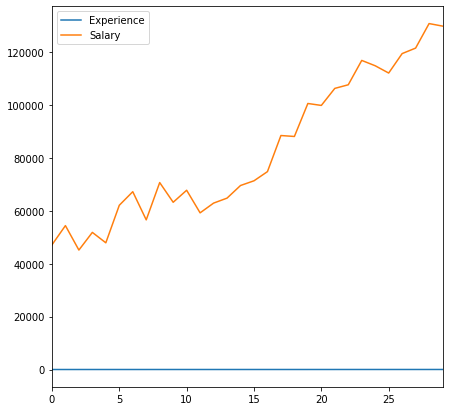

In [10]:
# Visualize salary data
data.plot(figsize = (7, 7))
plt.show()

In [11]:
# Create training and test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

,Experience,Salary
26,10.2,119355
3,2.5,51802
24,9.3,114755
22,8.6,107570
23,8.9,116774


In [22]:
# Initiailzing input and output features using training dataset
X_train = train_set.iloc[:, 0].values.reshape(-1, 1)
y_train = train_set.iloc[:, -1].values

In [23]:
# Initiailzing input and output features using test dataset
X_test = test_set.iloc[:, 0].values.reshape(-1, 1)
y_test = test_set.iloc[:, -1].values

In [24]:
# Using KNN Regressor and fitting training data
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors = 5, metric = "minkowski", p = 2)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [25]:
# Predicting salaries for test set
y_pred = knn_regressor.predict(X_test)

In [32]:
test_set["Predicted_Salary"] = y_pred

c:\users\dii2pi\appdata\local\continuum\anaconda3\envs\mach\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
test_set.head(5)

,Experience,Salary,Predicted_Salary
17,5.8,88399,72342.6
21,7.8,106207,107829.0
10,4.5,67723,64121.8
19,6.5,100504,72342.6
14,5.1,69517,66571.2


No handles with labels found to put in legend.


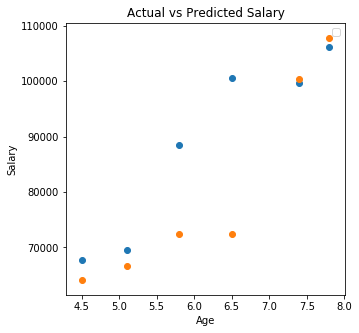

In [33]:
plt.figure(figsize = (5,5))
plt.title('Actual vs Predicted Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.scatter(list(test_set["Experience"]),list(test_set["Salary"]))
plt.scatter(list(test_set["Experience"]),list(test_set["Predicted_Salary"]))
plt.show()